In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv('/Users/hitaarthh/Documents/Amrita /Sem 5/ML Lab/Auto Value Pro/dataset/Cleaned_Car_data.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type,Transmission Type,No. of Previous Owners
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,Manual,1
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,Manual,2
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,Automatic,3
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,Manual,2
4,Ford Figo,Ford,2012,175000,41000,Diesel,Automatic,2


In [4]:
car.shape

(815, 8)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    815 non-null    object
 1   company                 815 non-null    object
 2   year                    815 non-null    int64 
 3   Price                   815 non-null    int64 
 4   kms_driven              815 non-null    int64 
 5   fuel_type               815 non-null    object
 6   Transmission Type       815 non-null    object
 7   No. of Previous Owners  815 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 51.1+ KB


##### Creating backup copy

In [6]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

#### year has many non-year values

In [7]:
car['year'] = car['year'].astype(str)
car = car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [8]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [9]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [10]:
car['Price'] = car['Price'].astype(str)
car['Price'] = car['Price'].str.replace(',', '').astype(int)

####  kms_driven has object values with kms at last.

In [11]:
car['kms_driven'] = car['kms_driven'].astype(str)
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [12]:
car=car[car['kms_driven'].str.isnumeric()]

In [13]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [14]:
car=car[~car['fuel_type'].isna()]

In [15]:
car.shape

(815, 8)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [16]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [17]:
car=car.reset_index(drop=True)

## Cleaned Data

In [18]:
car

,name,company,year,Price,kms_driven,fuel_type,Transmission Type,No. of Previous Owners
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,Manual,1
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,Manual,2
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,Automatic,3
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,Manual,2
4,Ford Figo,Ford,2012,175000,41000,Diesel,Automatic,2
...,...,...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol,Automatic,1
811,Tata Indica V2,Tata,2009,110000,30000,Diesel,Manual,4
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol,Automatic,4
813,Tata Zest XM,Tata,2018,260000,27000,Diesel,Automatic,3


In [19]:
car.to_csv('Cleaned_Car_data.csv')

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    815 non-null    object
 1   company                 815 non-null    object
 2   year                    815 non-null    int64 
 3   Price                   815 non-null    int64 
 4   kms_driven              815 non-null    int64 
 5   fuel_type               815 non-null    object
 6   Transmission Type       815 non-null    object
 7   No. of Previous Owners  815 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 51.1+ KB


In [21]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type,Transmission Type,No. of Previous Owners
count,815,815,815.000000,8.150000e+02,815.000000,815,815,815.000000
unique,254,25,NaN,NaN,NaN,3,2,NaN
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol,Manual,NaN
freq,51,221,NaN,NaN,NaN,428,419,NaN
mean,NaN,NaN,2012.442945,4.017933e+05,46277.096933,NaN,NaN,3.052761
std,NaN,NaN,4.005079,3.815888e+05,34318.459638,NaN,NaN,1.438643
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN,NaN,1.000000
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN,NaN,2.000000
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN,NaN,3.000000
75%,NaN,NaN,2015.000000,4.900000e+05,56879.000000,NaN,NaN,4.000000


In [22]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price

In [23]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [24]:
import seaborn as sns

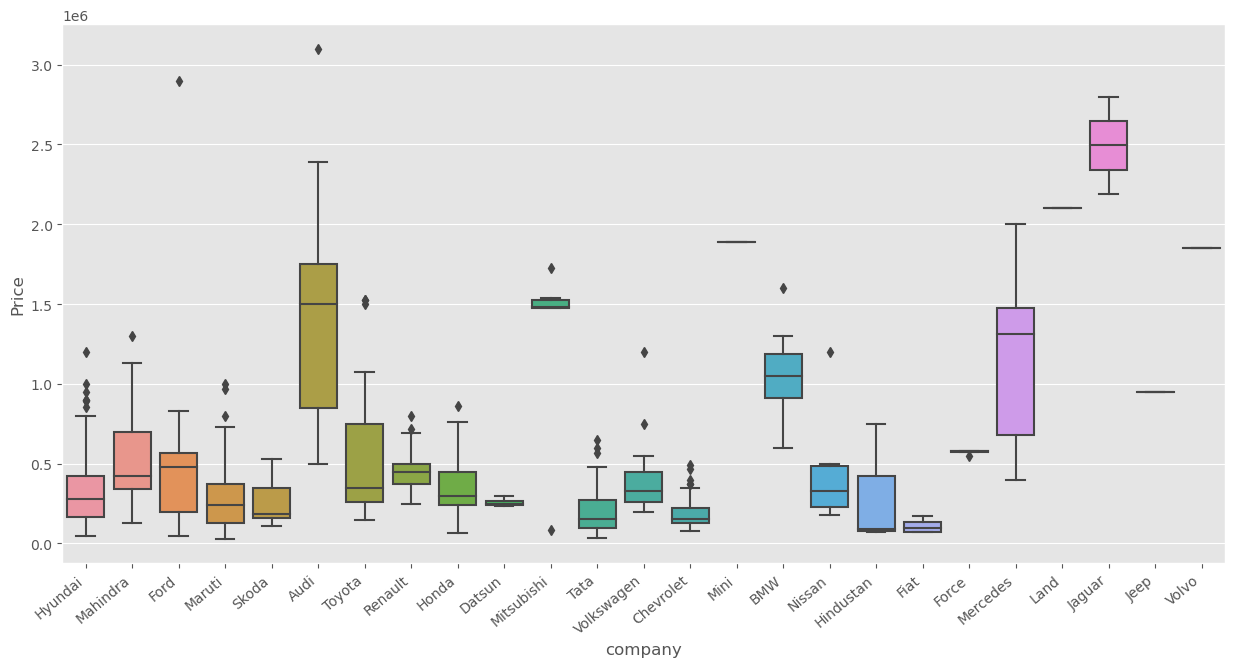

In [25]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

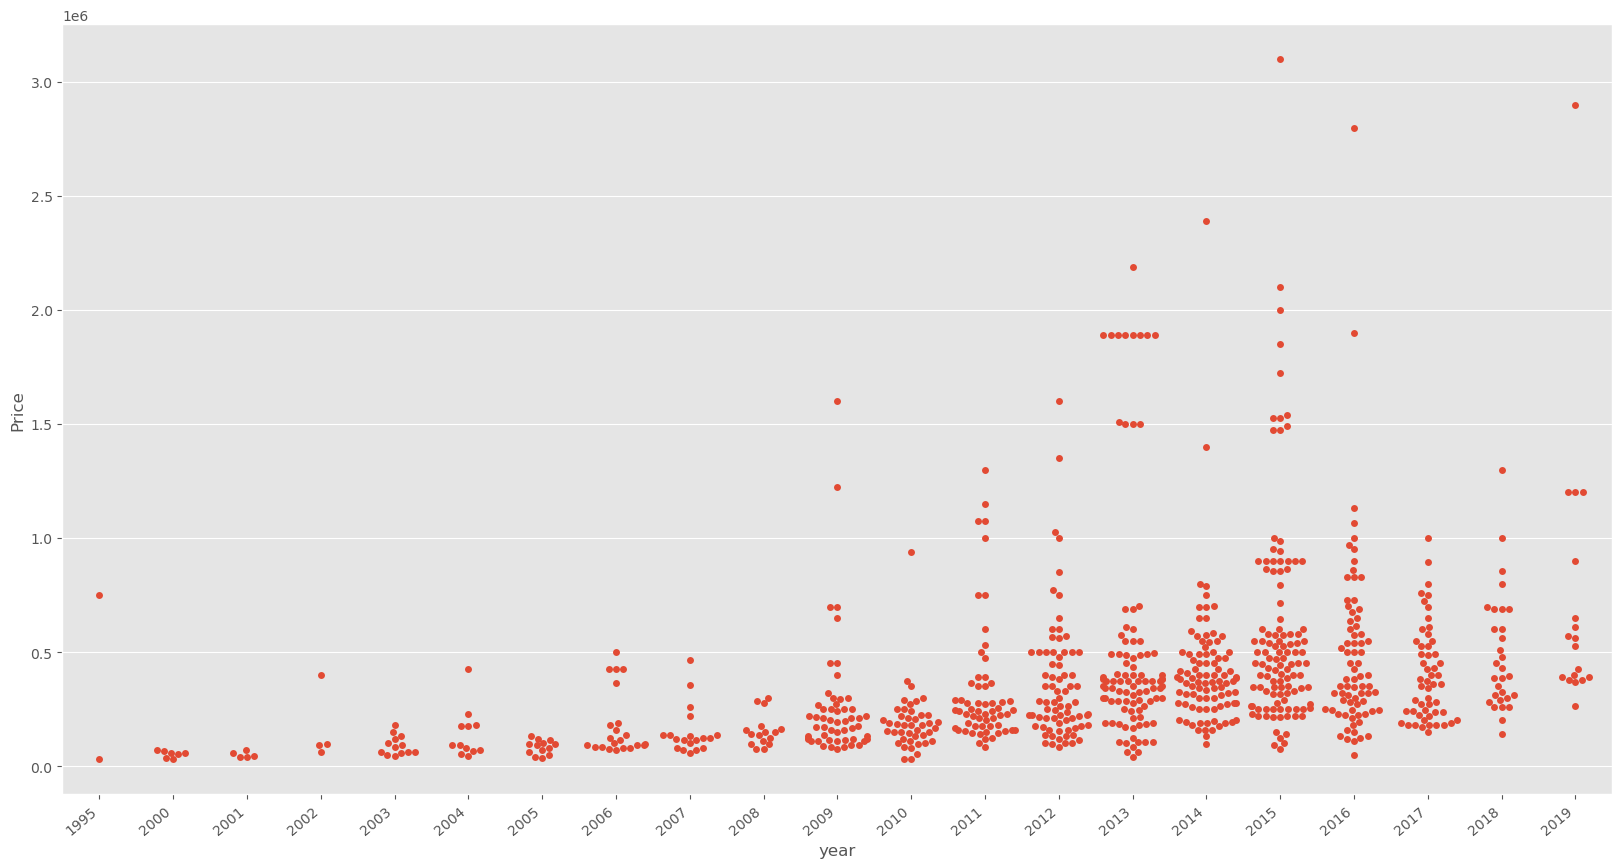

In [26]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

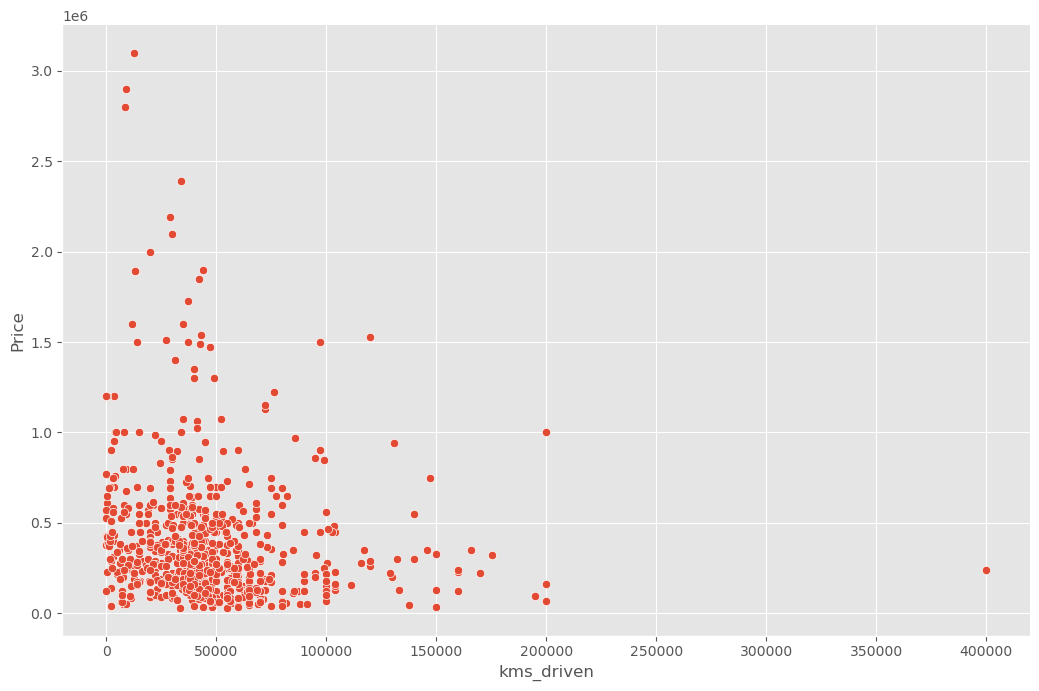

In [27]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

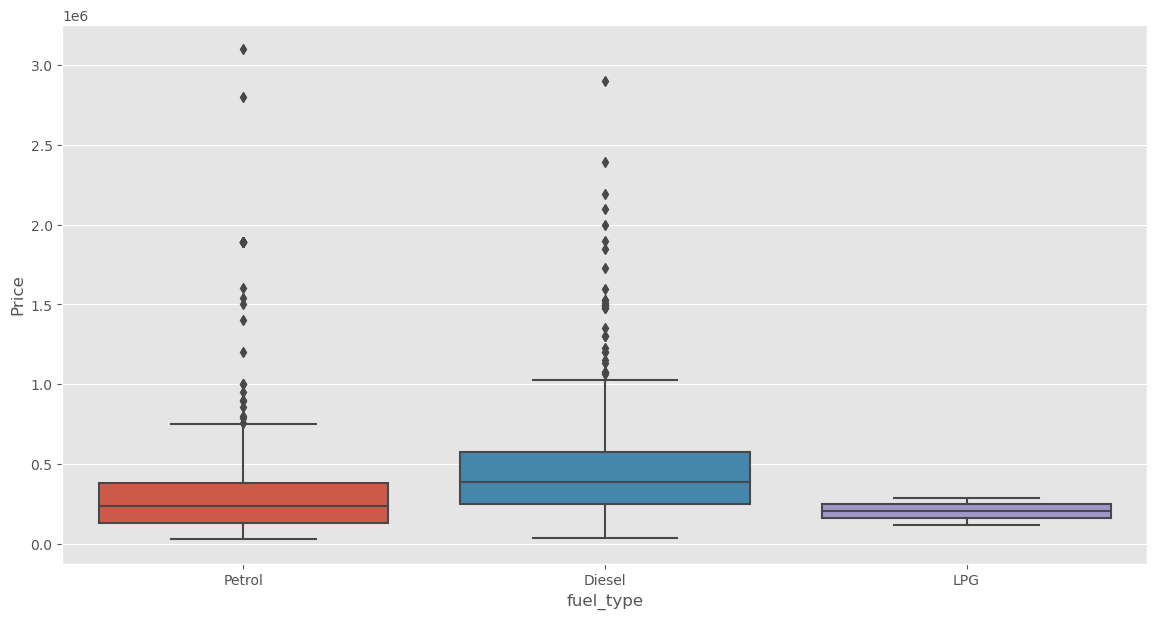

In [28]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [29]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    815 non-null    object
 1   company                 815 non-null    object
 2   year                    815 non-null    int64 
 3   Price                   815 non-null    int64 
 4   kms_driven              815 non-null    int64 
 5   fuel_type               815 non-null    object
 6   Transmission Type       815 non-null    object
 7   No. of Previous Owners  815 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 51.1+ KB


In [31]:
car.to_csv('Cleaned_Car_data.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    815 non-null    object
 1   company                 815 non-null    object
 2   year                    815 non-null    int64 
 3   Price                   815 non-null    int64 
 4   kms_driven              815 non-null    int64 
 5   fuel_type               815 non-null    object
 6   Transmission Type       815 non-null    object
 7   No. of Previous Owners  815 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 51.1+ KB


### Data Preprocessing and Cleaning Summary:
In this analysis, the raw data has undergone a meticulous cleaning process, aiming to enhance the quality and reliability of the dataset. The following key steps have been taken:
#### Outlier Removal:
- Identified and removed outliers to ensure that extreme or erroneous data points do not skew the analysis.
#### Feature Relationship Analysis:
- Explored and established relationships between different features within the dataset. This step is crucial for understanding how variables interact and contribute to the overall patterns.
#### Data Integrity Enhancement:
- Implemented measures to enhance data integrity by addressing missing or inconsistent values, promoting a more robust dataset for analysis.
#### File Saving:
- The cleaned dataset has been saved in a new file named "Cleaned_Car_data.csv". This file serves as a refined and improved version of the initial data, ready for further analysis.
